In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             roc_curve, roc_auc_score, silhouette_score)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Load and prepare data
glass_df = pd.read_csv('file:///home/jovyan/glass.csv')
glass_df['household'] = glass_df.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


### Logistic Regression

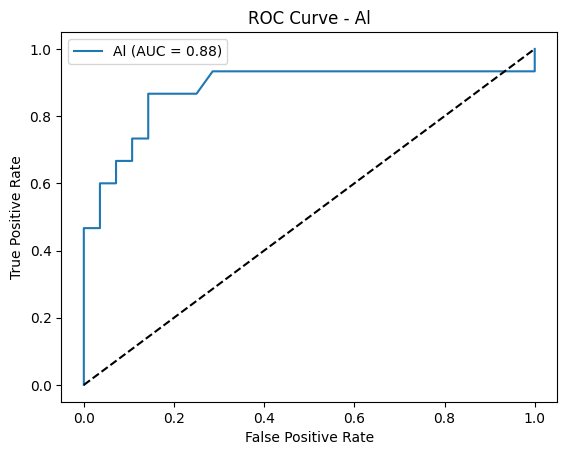


Al Threshold Analysis:
Threshold: 0.3 | Accuracy: 0.81 | Precision: 0.77 | Recall: 0.67
Threshold: 0.4 | Accuracy: 0.84 | Precision: 0.90 | Recall: 0.60
Threshold: 0.5 | Accuracy: 0.84 | Precision: 0.90 | Recall: 0.60
Threshold: 0.6 | Accuracy: 0.79 | Precision: 1.00 | Recall: 0.40
Threshold: 0.7 | Accuracy: 0.77 | Precision: 1.00 | Recall: 0.33


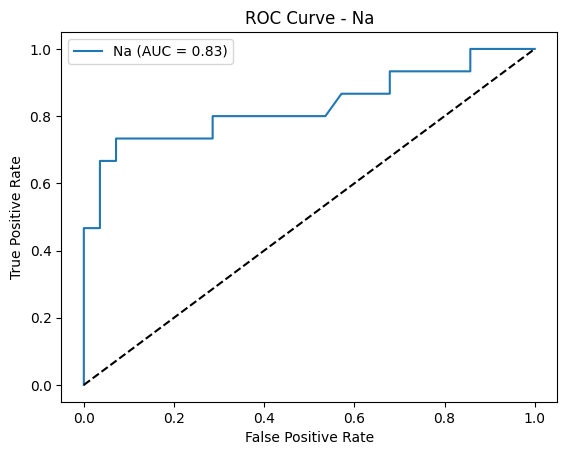


Na Threshold Analysis:
Threshold: 0.3 | Accuracy: 0.86 | Precision: 0.91 | Recall: 0.67
Threshold: 0.4 | Accuracy: 0.79 | Precision: 0.88 | Recall: 0.47
Threshold: 0.5 | Accuracy: 0.77 | Precision: 1.00 | Recall: 0.33
Threshold: 0.6 | Accuracy: 0.72 | Precision: 1.00 | Recall: 0.20
Threshold: 0.7 | Accuracy: 0.70 | Precision: 1.00 | Recall: 0.13


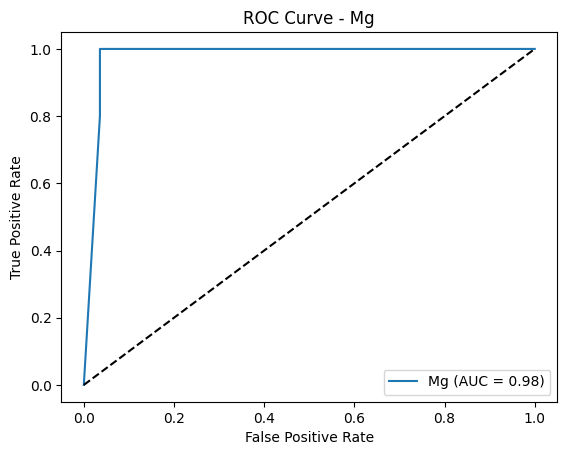


Mg Threshold Analysis:
Threshold: 0.3 | Accuracy: 0.95 | Precision: 0.93 | Recall: 0.93
Threshold: 0.4 | Accuracy: 0.93 | Precision: 0.93 | Recall: 0.87
Threshold: 0.5 | Accuracy: 0.93 | Precision: 0.93 | Recall: 0.87
Threshold: 0.6 | Accuracy: 0.93 | Precision: 0.93 | Recall: 0.87
Threshold: 0.7 | Accuracy: 0.93 | Precision: 0.93 | Recall: 0.87


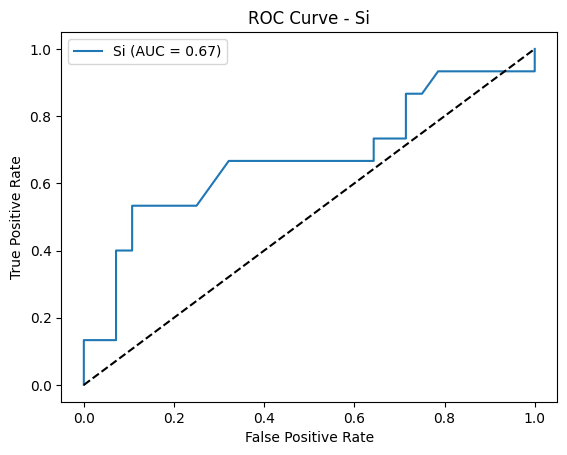


Si Threshold Analysis:
Threshold: 0.3 | Accuracy: 0.67 | Precision: 1.00 | Recall: 0.07
Threshold: 0.4 | Accuracy: 0.67 | Precision: 1.00 | Recall: 0.07
Threshold: 0.5 | Accuracy: 0.65 | Precision: 0.00 | Recall: 0.00
Threshold: 0.6 | Accuracy: 0.65 | Precision: 0.00 | Recall: 0.00
Threshold: 0.7 | Accuracy: 0.65 | Precision: 0.00 | Recall: 0.00


/opt/conda/envs/csgyd-6513-spring/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/csgyd-6513-spring/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/csgyd-6513-spring/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


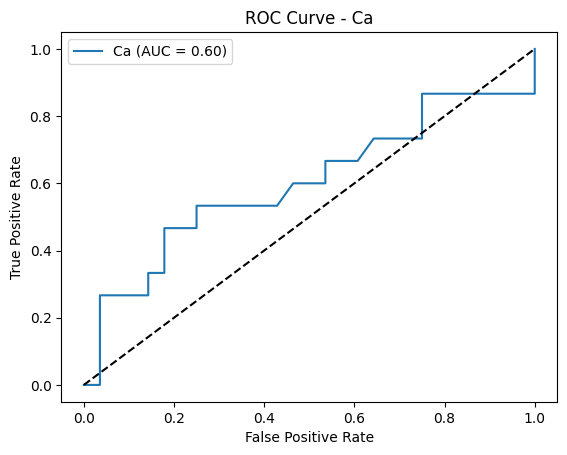


Ca Threshold Analysis:
Threshold: 0.3 | Accuracy: 0.65 | Precision: 0.00 | Recall: 0.00
Threshold: 0.4 | Accuracy: 0.65 | Precision: 0.00 | Recall: 0.00
Threshold: 0.5 | Accuracy: 0.65 | Precision: 0.00 | Recall: 0.00
Threshold: 0.6 | Accuracy: 0.65 | Precision: 0.00 | Recall: 0.00
Threshold: 0.7 | Accuracy: 0.65 | Precision: 0.00 | Recall: 0.00


/opt/conda/envs/csgyd-6513-spring/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/csgyd-6513-spring/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/csgyd-6513-spring/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt

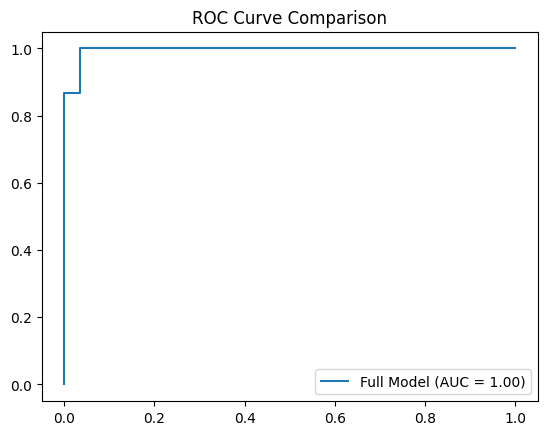

In [13]:


# 1. Threshold Analysis with ROC Curves
def analyze_thresholds(feature, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    probs = model.predict_proba(X_test)[:, 1]
    
    # ROC Curve calculations
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {feature}')
    plt.legend()
    plt.show()
    
    # Threshold analysis
    print(f"\n{feature} Threshold Analysis:")
    for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
        preds = (probs >= threshold).astype(int)
        print(f"Threshold: {threshold:.1f} | "
              f"Accuracy: {accuracy_score(y_test, preds):.2f} | "
              f"Precision: {precision_score(y_test, preds):.2f} | "
              f"Recall: {recall_score(y_test, preds):.2f}")

# Analyze all features
features = ['Al', 'Na', 'Mg', 'Si', 'Ca']
for feat in features:
    X_feat = glass_df[[feat]].values
    analyze_thresholds(feat, X_feat, glass_df.household)

# 2. Full Model with Preprocessing
X = glass_df.drop(['Type', 'household'], axis=1)
y = glass_df.household

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.select_dtypes(include=np.number).columns)
])

full_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
full_model.fit(X_train, y_train)

# Full model ROC curve
probs_full = full_model.predict_proba(X_test)[:, 1]
fpr_full, tpr_full, _ = roc_curve(y_test, probs_full)
plt.plot(fpr_full, tpr_full, label=f'Full Model (AUC = {roc_auc_score(y_test, probs_full):.2f})')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [16]:
# Q3: Comprehensive Model with Preprocessing

features = glass_data.drop(['Type', 'household'], axis=1)
target = glass_data.household


X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    features, target, test_size=0.2, random_state=123
)


numeric_cols = features.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

preprocessing_steps = ColumnTransformer([
    ('numerical', scaler, numeric_cols),
    ('categorical', encoder, [])  # Empty categorical for this dataset
])


full_model = Pipeline([
    ('preprocess', preprocessing_steps),
    ('classifier', LogisticRegression(solver='liblinear'))
])


full_model.fit(X_train_full, y_train_full)
final_preds = full_model.predict(X_test_full)

print("\nFull Model Performance:")
print(f"Classification Accuracy: {accuracy_score(y_test_full, final_preds):.4f}")



Full Model Performance:
Classification Accuracy: 0.9302


### Clustering Analysis

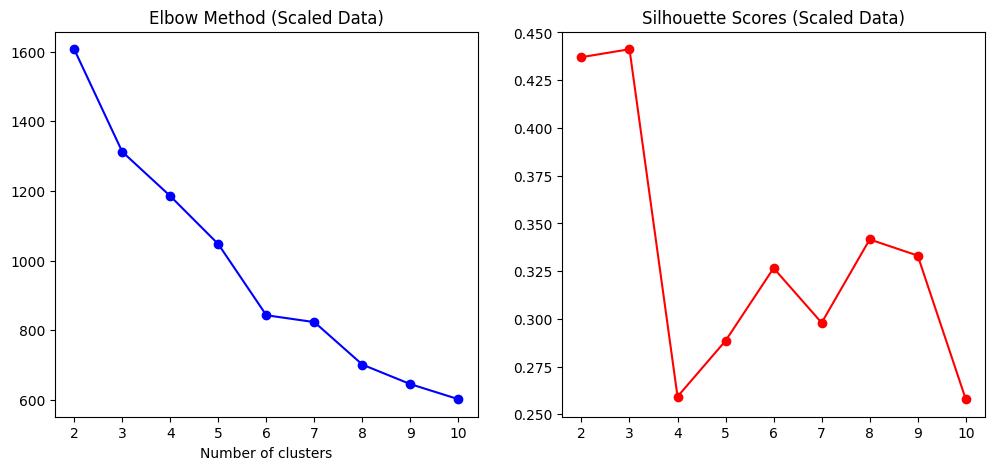

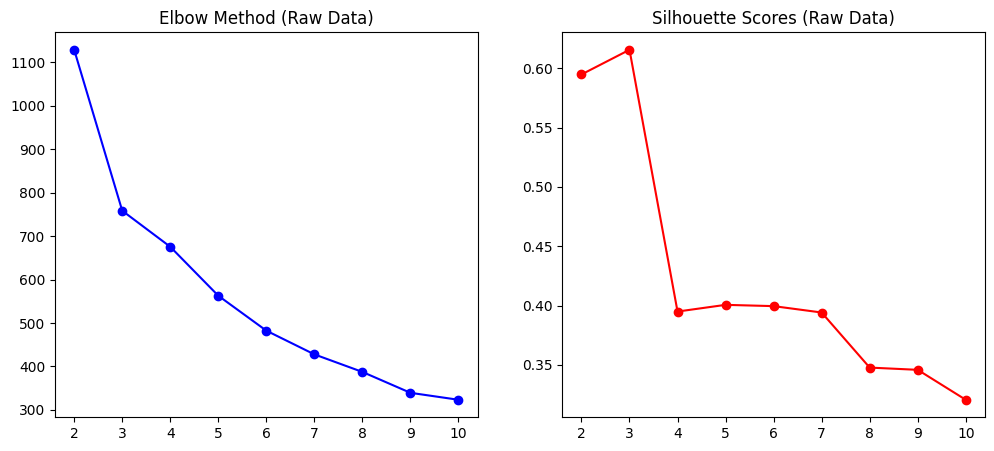

In [15]:

# Prepare data
cluster_features = glass_df.select_dtypes(include=np.number).columns.drop('household')
X_cluster = glass_df[cluster_features]

# 1. With Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


inertia = []
silhouettes = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-')
plt.title('Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, 'ro-')
plt.title('Silhouette Scores (Scaled Data)')
plt.show()

# 2. Without Scaling
inertia_raw = []
silhouettes_raw = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia_raw.append(kmeans.inertia_)
    silhouettes_raw.append(silhouette_score(X_cluster, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_raw, 'bo-')
plt.title('Elbow Method (Raw Data)')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes_raw, 'ro-')
plt.title('Silhouette Scores (Raw Data)')
plt.show()


### Inertia & Silhouette vs. k (Scaled Data).

Inertia decreases rapidly from k=2 to k=4, then the elbow begins to flatten around k≈6, suggesting diminishing returns from additional clusters beyond six.

Silhouette Score peaks at k=3 (~0.44), dips at k=4, then shows smaller local peaks at k=8 (~0.34). A high silhouette (closer to 1) indicates well‑separated clusters, so k=3 or k=8 are the strongest candidates on scaled data.

### Without Scaling.

Inertia still falls as k increases, but the elbow is much less pronounced—raw feature magnitudes dominate the distance computations, so adding clusters always pays off.

Silhouette scores are uniformly lower (peak ~0.62 at k=3 but then sharply decay), indicating that clusters in unscaled space overlap heavily except when very few clusters are used.

### Choosing k. 
No single “correct” k exists in an absolute sense;For this dataset, k = 3 offers the highest average silhouette (best separation) and a clear elbow; k = 6–8 could also be defensible if finer segmentation is required—and especially when features are scaled, which equalizes the influence of each dimension.